In [33]:
import numpy as np
from sklearn import linear_model,datasets,metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from pandas import DataFrame
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
%matplotlib inline

In [34]:
def model2(source,target):
    #1.pca  parameter selection
    df=pd.read_csv(source)
    #df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)
    df.drop(['Unnamed: 0'], axis=1,inplace=True)
    #X = df.iloc[:,0:-23]#只用于pos
    X = df.iloc[:,0:-1]
    print(X.head())
    y = df.ix[:,-1]
    #Fitting the PCA algorithm with our Data
    pca = PCA().fit(X)
    #Plotting the Cumulative Summation of the Explained Variance
    plt.figure()
    ratio=pca.explained_variance_ratio_
    plt.plot([i for i in range(X.shape[1])],
             [np.sum(ratio[:i+1]) for i in range(X.shape[1])])
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xticks(np.arange(X.shape[1],step=5000))
    plt.yticks(np.arange(0,1.01,0.05))
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)') #for each component
    #plt.title('Pulsar Dataset Explained Variance')
    plt.grid()
    plt.show()
    
    #2.show pricipal components
    pca=PCA(n_components=0.95)
    pca.fit(X,y)
    ratio=pca.explained_variance_ratio_
    print("pca.components_",pca.components_.shape)
    #print("pca.components_",pca.components_)
    print("pca_var_ratio",pca.explained_variance_ratio_.shape)
    n_pcs= pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    initial_feature_names = X.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
    #dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
    dic = {'{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
    df_n = pd.DataFrame(sorted(dic.items()))
    print(df_n)
    df_n.columns=['rank','feature']
    df_n['rank']=df_n['rank'].astype('int')
    print(df_n.columns)
    
    df_n = df_n.sort_values(by="rank",ascending=True)
    print(df_n[0:30])
    
    #3.pca reduce dimension
    #pca=PCA(n_components=  )
    reduced_X = pca.fit_transform(X)
    print(X.shape[1])
    print(reduced_X.shape[1])
    train_X,test_X,train_y,test_y=train_test_split(reduced_X,y,test_size=0.25,random_state=0)
    print(train_y.dtypes)

    #4.model fit and result
    LR = ElasticNet(random_state=0)
    #LR = SVC(kernel='rbf', probability=True) 
    #LR=LogisticRegression(penalty='l2')    
    ### 对训练数据进行拟合训练
    LR.fit(train_X, train_y)

    ### 输出参数,分别是截距（intercept_）和权重参数(coef_）
#     print('LR.intercept:\n',LR.intercept_)
#     print('LR.coef:\n',LR.coef_)

    ### 根据测试数据计算预测值y_predict
    train_y_predict=LR.predict(train_X).astype('int64')
    test_y_predict=LR.predict(test_X).astype('int64')
#     train_y=train_y.astype('str')
#     test_y=test_y.astype('str')

    ###保存预测值和实际值
    result=DataFrame({"test_y":test_y.tolist(),"test_y_predict":test_y_predict.tolist()},columns=["test_y","test_y_predict"])
    result.to_csv(target)

#     R2=cross_val_score(LR, train_X,train_y, cv=10, scoring='r2').mean()
#     MSE=cross_val_score(LR, train_X,train_y, cv=10, scoring='neg_mean_squared_error').mean()
#     RMSE=np.sqrt(MSE)
#     print(R2)
#     print(MSE)
#     print(RMSE)

    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('train R^2:\n',LR.score(train_X,train_y))
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("train MSE:",metrics.mean_squared_error(train_y,train_y_predict))
    ### RMSE为均方根误差
    print('train RMSE:',np.sqrt(metrics.mean_squared_error(train_y,train_y_predict)))

    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('test R^2:\n',LR.score(test_X,test_y))
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("test MSE:",metrics.mean_squared_error(test_y,test_y_predict))
    ### RMSE为均方根误差
    print('test RMSE:',np.sqrt(metrics.mean_squared_error(test_y,test_y_predict)))


    print('test_y_predict:\n',test_y_predict[0:5])    ### 输出预测值前5行
    print('test_y:\n',test_y[0:5])          ### 输出测试值前5行
    
    #从sklearn.metrics导入classification_report
    from sklearn.metrics import classification_report

    #使用逻辑斯蒂回归模型自带的评分函数score获得模型在测试集上的准确性结果
    print('Accuracy of LR Classifier:',LR.score(test_X,test_y))
    #使用classification_report模块获得逻辑斯蒂模型其他三个指标的结果（召回率，精确率，调和平均数）
    print(classification_report(test_y,test_y_predict,target_names=['1','2','3']))
    #print(metrics.precision_score(test_y,test_y_predict))
    print(confusion_matrix(test_y,test_y_predict))
    
    
    
#     #precision = metrics.precision_score(test_y,test_y_predict)
#     precision = metrics.precision_score(test_y[0:5],test_y_predict[0:5])
#     recall = metrics.recall_score(test_y[0:5],test_y_predict[0:5])    
#     print('precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall))    
#     #accuracy = metrics.accuracy_score(test_y, test_y_predict)    
#     #print('accuracy: %.2f%%' % (100 * accuracy))
    
    
#     plt.scatter(test_y,test_y_predict,c='b',alpha=0.5,marker='*')   
#     plt.xlabel('test_y')
#     plt.ylabel('test_y_predict')
#     plt.plot([test_y.min(),test_y.max()],[test_y.min(),test_y.max()],'k--',lw=4)   ### 画出y=x这条线
#     plt.show()





   choiceShe.NN  von.VBP  alt.VBZ  day/date.VB  PRODUCTS.NNP  ten,000.VBP  \
0           0.0      0.0      0.0          0.0           0.0          0.0   
1           0.0      0.0      0.0          0.0           0.0          0.0   
2           0.0      0.0      0.0          0.0           0.0          0.0   
3           0.0      0.0      0.0          0.0           0.0          0.0   
4           0.0      0.0      0.0          0.0           0.0          0.0   

   lynntravis.NN  cross.NNS  Fontu.NNP  lifecore.VB   ...     memo.JJ  \
0            0.0        0.0        0.0          0.0   ...         0.0   
1            0.0        0.0        0.0          0.0   ...         0.0   
2            0.0        0.0        0.0          0.0   ...         0.0   
3            0.0        0.0        0.0          0.0   ...         0.0   
4            0.0        0.0        0.0          0.0   ...         0.0   

   HEALTH-RELATED.NNP  successo.VBP  disorder.JJ  heat-emitting.JJ  \
0                 0.0       

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


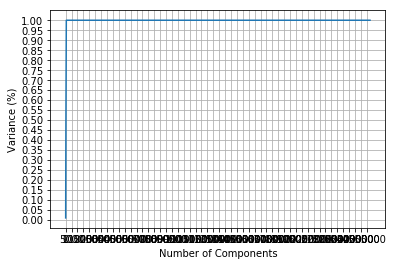

pca.components_ (463, 257716)
pca_var_ratio (463,)
       0              1
0      1        my.PRP$
1     10       Life.NNP
2    100      honest.VB
3    101       help.NNS
4    102         IS.NNP
5    103         IS.NNP
6    104         IS.NNP
7    105          im.NN
8    106         IS.NNP
9    107         dnt.JJ
10   108         IS.NNP
11   109      social.JJ
12    11       Life.NNP
13   110        UAE.NNP
14   111     against.IN
15   112     elegant.NN
16   113      honest.VB
17   114         Hi.NNP
18   115       help.NNS
19   116         dnt.JJ
20   117         IS.NNP
21   118       Dream.NN
22   119       Dream.NN
23    12       Life.NNP
24   120  friendship.NN
25   121       Dream.NN
26   122      waste.VBG
27   123  Lawerence.NNP
28   124       Make.NNP
29   125         IS.NNP
..   ...            ...
433   72      honest.VB
434   73         add.VB
435   74        true.JJ
436   75    require.VBN
437   76      block.VBN
438   77     exactly.RB
439   78        real.JJ
440   79     

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
model2("pan13-author-profiling-training-corpus-2013-01-09/ti_social_lexical_matrix.csv","social_lexical_result.csv")

          )    #         ,        FW        IN       JJS       RBS      PRP$  \
0  0.280332  0.0  0.146619  0.000000  0.138137  0.188826  0.286825  0.149077   
1  0.000000  0.0  0.145507  0.000000  0.137090  0.187394  0.284650  0.147946   
2  0.000000  0.0  0.160119  0.000000  0.150857  0.206213  0.000000  0.162804   
3  0.235395  0.0  0.123116  0.350057  0.115994  0.158557  0.000000  0.125180   
4  0.000000  0.0  0.157862  0.000000  0.148730  0.000000  0.308820  0.160509   

        VBN        ``  ...       JJR  WP$  PDT        EX        DT        TO  \
0  0.152673  0.000000  ...  0.184587  0.0  0.0  0.223018  0.139630  0.146457   
1  0.151515  0.308790  ...  0.000000  0.0  0.0  0.221327  0.138571  0.145346   
2  0.166731  0.000000  ...  0.201583  0.0  0.0  0.243554  0.152487  0.159943   
3  0.128199  0.261272  ...  0.154997  0.0  0.0  0.187268  0.117247  0.122980   
4  0.164380  0.335010  ...  0.198741  0.0  0.0  0.240120  0.150337  0.157688   

    LS     NNPS        MD       WDT  


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


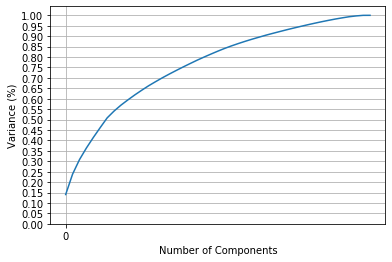

pca.components_ (36, 45)
pca_var_ratio (36,)
     0     1
0    1     (
1   10   RBR
2   11   POS
3   12     #
4   13   POS
5   14   WP$
6   15   JJS
7   16   WP$
8   17     :
9   18    ''
10  19    RP
11   2     (
12  20   JJR
13  21   SYM
14  22   WDT
15  23   WDT
16  24    CD
17  25   VBZ
18  26   WRB
19  27    TO
20  28     .
21  29  PRP$
22   3    ``
23  30     ,
24  31    RB
25  32   VBG
26  33   VBG
27  34    CC
28  35   VBD
29  36    RB
30   4  NNPS
31   5   RBS
32   6    FW
33   7     $
34   8    EX
35   9   PDT
Index(['rank', 'feature'], dtype='object')
    rank feature
0      1       (
11     2       (
22     3      ``
30     4    NNPS
31     5     RBS
32     6      FW
33     7       $
34     8      EX
35     9     PDT
1     10     RBR
2     11     POS
3     12       #
4     13     POS
5     14     WP$
6     15     JJS
7     16     WP$
8     17       :
9     18      ''
10    19      RP
12    20     JJR
13    21     SYM
14    22     WDT
15    23     WDT
16    24      CD
17    

D:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test_y_predict:
 [3 3 2 3 3]
test_y:
 5069     3
17262    2
4522     3
10617    3
9561     3
Name: AGE, dtype: int64
Accuracy of LR Classifier: 0.597295012679628
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       422
           2       0.62      0.21      0.31      2180
           3       0.59      0.93      0.72      3313

    accuracy                           0.60      5915
   macro avg       0.41      0.38      0.35      5915
weighted avg       0.56      0.60      0.52      5915

[[   0   39  383]
 [   0  457 1723]
 [   0  237 3076]]


D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
model2("pan13-author-profiling-training-corpus-2013-01-09/ti_social_pos_matrix.csv","social_pos_result.csv")

          )    #         ,        FW        IN       JJS       RBS      PRP$  \
0  0.280332  0.0  0.146619  0.000000  0.138137  0.188826  0.286825  0.149077   
1  0.000000  0.0  0.145507  0.000000  0.137090  0.187394  0.284650  0.147946   
2  0.000000  0.0  0.160119  0.000000  0.150857  0.206213  0.000000  0.162804   
3  0.235395  0.0  0.123116  0.350057  0.115994  0.158557  0.000000  0.125180   
4  0.000000  0.0  0.157862  0.000000  0.148730  0.000000  0.308820  0.160509   

        VBN        ``  ...       JJR  WP$  PDT        EX        DT        TO  \
0  0.152673  0.000000  ...  0.184587  0.0  0.0  0.223018  0.139630  0.146457   
1  0.151515  0.308790  ...  0.000000  0.0  0.0  0.221327  0.138571  0.145346   
2  0.166731  0.000000  ...  0.201583  0.0  0.0  0.243554  0.152487  0.159943   
3  0.128199  0.261272  ...  0.154997  0.0  0.0  0.187268  0.117247  0.122980   
4  0.164380  0.335010  ...  0.198741  0.0  0.0  0.240120  0.150337  0.157688   

    LS     NNPS        MD       WDT  


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


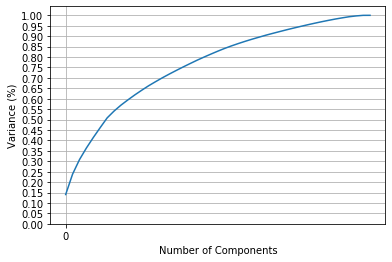

pca.components_ (36, 45)
pca_var_ratio (36,)
     0     1
0    1     (
1   10   RBR
2   11   POS
3   12     #
4   13   POS
5   14   WP$
6   15   JJS
7   16   WP$
8   17     :
9   18    ''
10  19    RP
11   2     (
12  20   JJR
13  21   SYM
14  22   WDT
15  23   WDT
16  24    CD
17  25   VBZ
18  26   WRB
19  27    TO
20  28     .
21  29  PRP$
22   3    ``
23  30     ,
24  31    RB
25  32   VBG
26  33   VBG
27  34    CC
28  35   VBD
29  36    RB
30   4  NNPS
31   5   RBS
32   6    FW
33   7     $
34   8    EX
35   9   PDT
Index(['rank', 'feature'], dtype='object')
    rank feature
0      1       (
11     2       (
22     3      ``
30     4    NNPS
31     5     RBS
32     6      FW
33     7       $
34     8      EX
35     9     PDT
1     10     RBR
2     11     POS
3     12       #
4     13     POS
5     14     WP$
6     15     JJS
7     16     WP$
8     17       :
9     18      ''
10    19      RP
12    20     JJR
13    21     SYM
14    22     WDT
15    23     WDT
16    24      CD
17    

D:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
model2("pan13-author-profiling-training-corpus-2013-01-09/ti_social_pos_matrix.csv","social_pos_result1.csv")

   wabasta  eighty-eighth  thrombocytopenia  2threads  200gb/s  rovio  \
0      0.0            0.0               0.0       0.0      0.0    0.0   
1      0.0            0.0               0.0       0.0      0.0    0.0   
2      0.0            0.0               0.0       0.0      0.0    0.0   
3      0.0            0.0               0.0       0.0      0.0    0.0   
4      0.0            0.0               0.0       0.0      0.0    0.0   

   consejos  home-owner  résumé  affordabilitythe    ...      really…  fart  \
0       0.0         0.0     0.0               0.0    ...          0.0   0.0   
1       0.0         0.0     0.0               0.0    ...          0.0   0.0   
2       0.0         0.0     0.0               0.0    ...          0.0   0.0   
3       0.0         0.0     0.0               0.0    ...          0.0   0.0   
4       0.0         0.0     0.0               0.0    ...          0.0   0.0   

   starcomms  funnily  plugging  workman  braking  bronze  sub-flooring  \
0        0.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


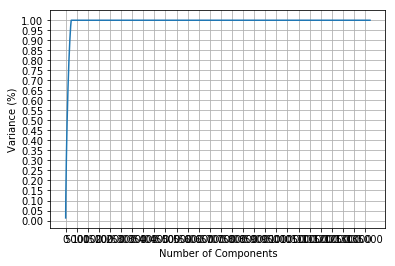

pca.components_ (2135, 137223)
pca_var_ratio (2135,)
         0            1
0        1            i
1       10           my
2      100     everyone
3     1000       univer
4     1001      wishers
5     1002  complextion
6     1003  caterpiller
7     1004      fastest
8     1005      looking
9     1006      premium
10    1007  complextion
11    1008  complextion
12    1009         atoz
13     101         hope
14    1010  hemorrhoids
15    1011         vote
16    1012         like
17    1013        hiiii
18    1014   definitely
19    1015        hiiii
20    1016   affordable
21    1017       feelin
22    1018       advise
23    1019        thngs
24     102            @
25    1020     makboluo
26    1021  caterpiller
27    1022      wishers
28    1023        bread
29    1024      capable
...    ...          ...
2105   972        gbemu
2106   973        hiiii
2107   974       ticker
2108   975  hemorrhoids
2109   976          bet
2110   977         suwe
2111   978        extra
2112   979 

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        38
           2       0.38      1.00      0.55       236
           3       0.00      0.00      0.00       351

   micro avg       0.38      0.38      0.38       625
   macro avg       0.13      0.33      0.18       625
weighted avg       0.14      0.38      0.21       625

[[  0  38   0]
 [  0 236   0]
 [  0 351   0]]


In [3]:
model2("pan13-author-profiling-training-corpus-2013-01-09/ti_social_lemma_matrix.csv","social_lemma_result.csv")

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


<function matplotlib.pyplot.show(*args, **kw)>

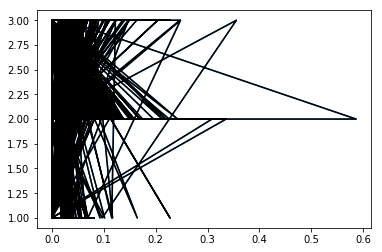

In [5]:
#lemma model 里最显著的4个特征变化趋势
import matplotlib.pylab as pyl
ti_lemma= pd.read_csv("pan13-author-profiling-training-corpus-2013-01-09/ti_social_lemma_matrix.csv")
x=ti_lemma['i']
y=ti_lemma.ix[:,-1]
pyl.plot(x,y)
pyl.plot(x,y,'k')
pyl.show

Text(0.5, 1.0, 'Lemma Feature: <i>')

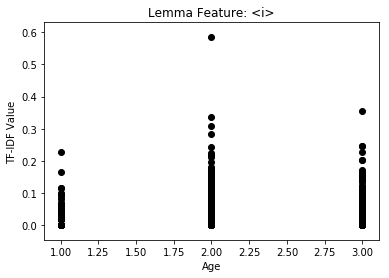

In [10]:
pyl.scatter(y,x,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('Lemma Feature: <i>')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 1.0, 'Lemma Feature: <love>')

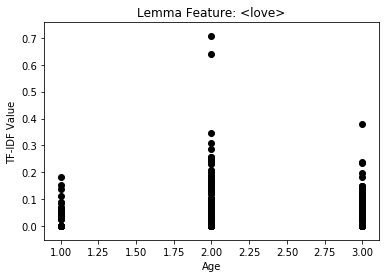

In [11]:
y1=ti_lemma['love']
x1=ti_lemma.ix[:,-1]
pyl.scatter(x1,y1,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('Lemma Feature: <love>')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 1.0, 'Lemma Feature: <here>')

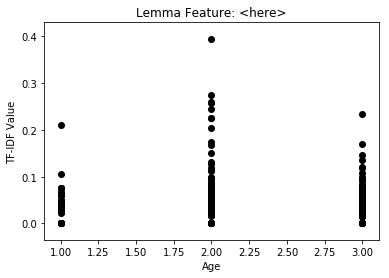

In [21]:
y2=ti_lemma['here']
x2=ti_lemma.ix[:,-1]
pyl.scatter(x2,y2,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('Lemma Feature: <here>')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'POS Feature: <NNPS>')

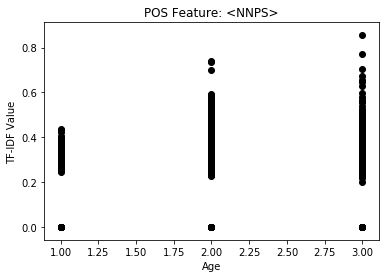

In [23]:
ti_pos= pd.read_csv("pan13-author-profiling-training-corpus-2013-01-09/ti_social_pos_matrix.csv")
y=ti_pos['NNPS']
x=ti_pos.ix[:,-1]
pyl.scatter(x,y,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('POS Feature: <NNPS>')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 1.0, 'POS Feature: <``>')

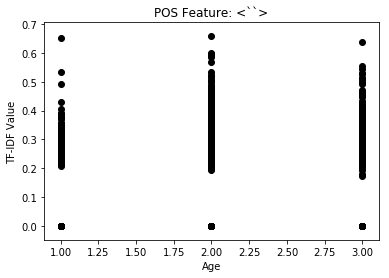

In [25]:
y=ti_pos['``']
x=ti_pos.ix[:,-1]
pyl.scatter(x,y,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('POS Feature: <``>')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 1.0, 'POS Feature: <PDT>')

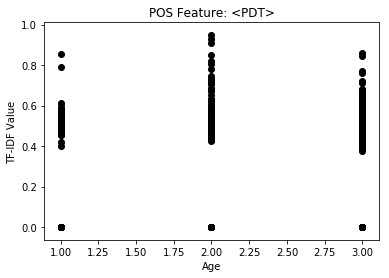

In [30]:
y=ti_pos['PDT']
x=ti_pos.ix[:,-1]
pyl.scatter(x,y,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('POS Feature: <PDT>')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'POS Feature: <my.PRP$>')

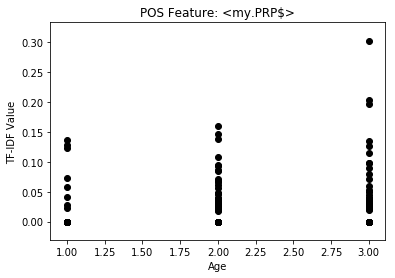

In [37]:
ti_lexical= pd.read_csv("pan13-author-profiling-training-corpus-2013-01-09/ti_social_lexical_matrix.csv")
y=ti_lexical['my.PRP$']
x=ti_lexical.ix[:,-1]
pyl.scatter(x,y,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('POS Feature: <my.PRP$>')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 1.0, 'POS Feature: <need.NN>')

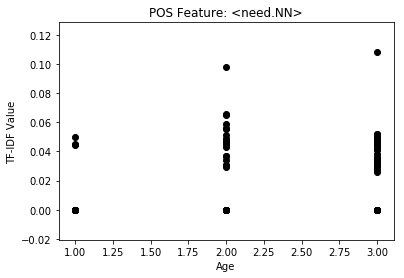

In [47]:
y=ti_lexical['need.NN']
x=ti_lexical.ix[:,-1]
pyl.scatter(x,y,color='black')
pyl.ylabel('TF-IDF Value')
pyl.xlabel('Age')
pyl.title('POS Feature: <need.NN>')